## Initial ML Models

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Training data
train_data = pd.read_excel("/content/train_data_translation (1).xlsx")

train_data.head()

,S.No,Comments,Label,Translated_Text,cleaned_comments,tokenized_comments,final_text,lang_type
0,HATE_2857,Dr YNM 1 month ago ఇందులో మనం పెద్దగా ఆలోచించ...,non-hate,Dr YNM 1 month ago We don't need to think much...,Dr YNM 1 month ago We dont need to think much ...,"['Dr', 'YNM', '1', 'month', 'ago', 'We', 'dont...","['Dr', 'YNM', '1', 'month', 'ago', 'dont', 'ne...",Unknown
1,HATE_2969,lakshmankumar kavali Next Step is tdp vallu m...,non-hate,Laxman Kumar wants to be the next step and TDP...,Laxman Kumar wants to be the next step and TDP...,"['Laxman', 'Kumar', 'wants', 'to', 'be', 'the'...","['Laxman', 'Kumar', 'wants', 'next', 'step', '...",Unknown
2,HATE_1985,​trs party lo telangana kosam poradina valle ...,non-hate,​trs party lo telangana kosam poradina valle u...,trs party lo telangana kosam poradina valle un...,"['trs', 'party', 'lo', 'telangana', 'kosam', '...","['trs', 'party', 'lo', 'telangana', 'kosam', '...",Unknown
3,HATE_2974,అన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల రూ...,non-hate,6093 crore rupees one day printing by Annayya ...,6093 crore rupees one day printing by Annayya ...,"['6093', 'crore', 'rupees', 'one', 'day', 'pri...","['6093', 'crore', 'rupees', 'one', 'day', 'pri...",English
4,HATE_2810,ఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజకీ...,non-hate,These political vultures will even target me f...,These political vultures will even target me f...,"['These', 'political', 'vultures', 'will', 'ev...","['political', 'vultures', 'even', 'target', 'o...",English


In [ ]:
def plot_confusion_matrix(y_test, y_pred, num_labels=2):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_labels)],
                yticklabels=[f'Class {i}' for i in range(num_labels)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label='hate')

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.text(0.6, 0.3, f'AUC = {roc_auc:.2f}')
    plt.show()

In [ ]:
def ml_model_eval(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='hate')
  recall = recall_score(y_test, y_pred,  pos_label='hate')
  f1 = f1_score(y_test, y_pred, pos_label='hate')
  plot_confusion_matrix(y_test,y_pred)

  print("Accuracy:", accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  print("F1-Score:", f1)

In [ ]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["final_text"])
y_train = train_data["Label"]

##Logistic Regression

In [ ]:
# Creating and training a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

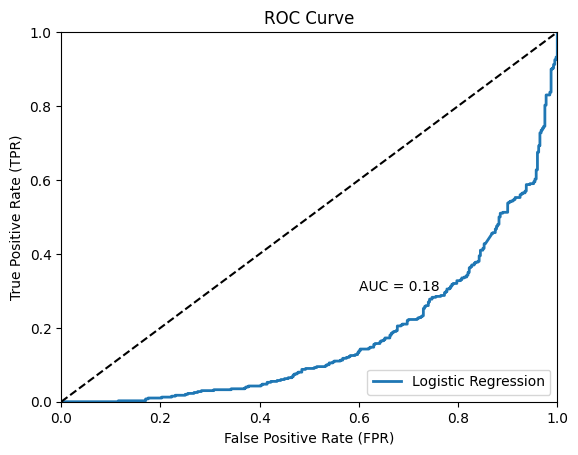

In [ ]:
#Testing data
test_data = pd.read_excel("/content/Copy of test_data_translation (1)(1).xlsx")
# Text vectorization using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_data["final_text"])
y_test = test_data["Label"]
y_pred = model.predict(X_test_tfidf)

plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'Logistic Regression')

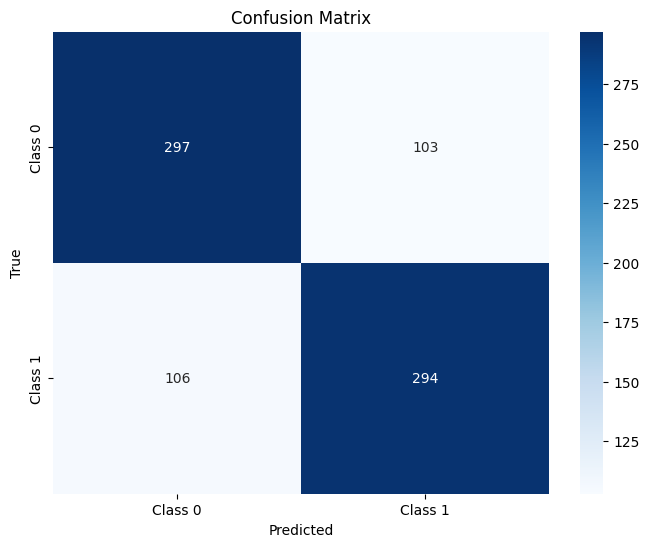

Accuracy: 0.73875
Precision: 0.7369727047146402
Recall: 0.7425
F1-Score: 0.7397260273972602


In [ ]:
ml_model_eval(y_test,y_pred)

##Naive Bayes

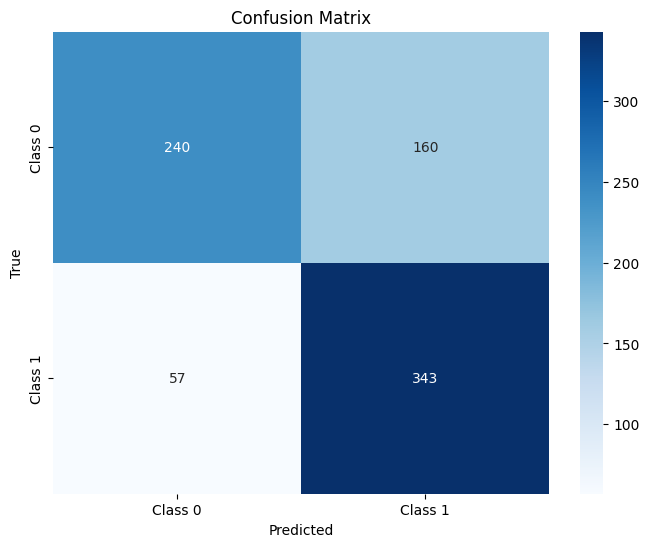

Accuracy: 0.72875
Precision: 0.8080808080808081
Recall: 0.6
F1-Score: 0.6886657101865136


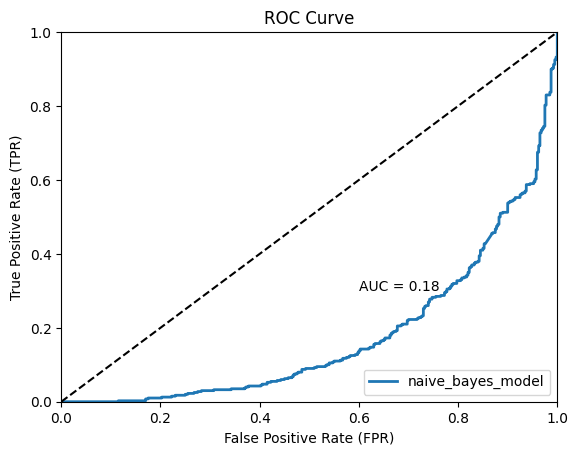

In [ ]:
#Creating a naive bayes model
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

#Evaluating the model on the test data
X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_comments"])
y_test = test_data["Label"]
y_pred = naive_bayes_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'naive_bayes_model')

##Support Vector Machine

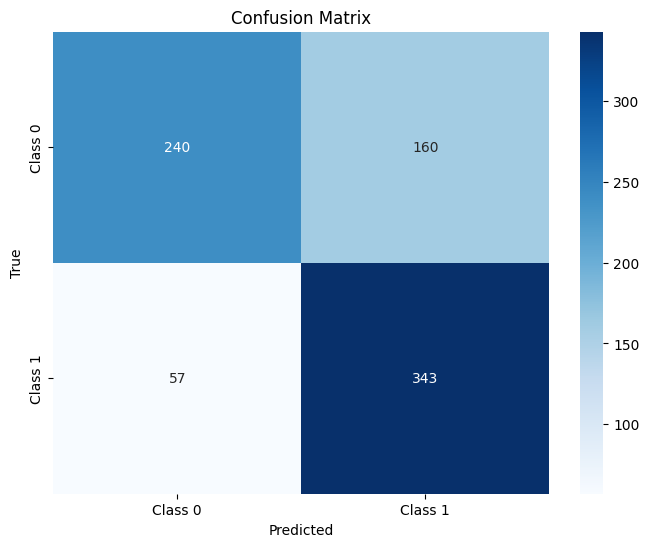

Accuracy: 0.72875
Precision: 0.8080808080808081
Recall: 0.6
F1-Score: 0.6886657101865136


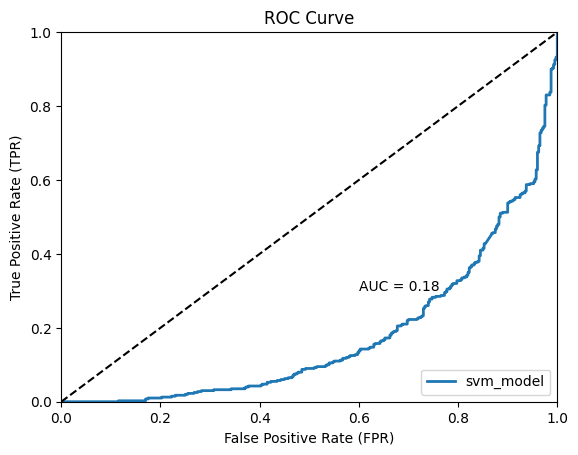

In [ ]:
from sklearn.svm import SVC

# Creating a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

# Evaluating the model on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'svm_model')

# Pre processing for sequencial DL models


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
# Training data
original_train_data = pd.read_excel('/content/train_data_translation (1).xlsx')
# Testing data
new_test_data = pd.read_excel('/content/Copy of test_data_translation (1)(1).xlsx')


X_train = original_train_data["final_text"]
y_train = original_train_data["Label"]

X_test = new_test_data["final_text"]
y_test = new_test_data["Label"]

# Tokenizing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Encoding labels as integers with a default index for unknown labels
label_to_index = {'non-hate': 0, 'hate': 1}
default_index = len(label_to_index)

y_train_encoded = [label_to_index.get(label, default_index) for label in y_train]
y_test_encoded = [label_to_index.get(label, default_index) for label in y_test]

# Converting the encoded labels to NumPy arrays and reshaping
y_train_encoded = np.array(y_train_encoded).reshape(-1, 1)
y_test_encoded = np.array(y_test_encoded).reshape(-1, 1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_test_padded, y_test, index_to_label):
    y_pred = model.predict(X_test_padded)
    y_pred = (y_pred > 0.5).astype(int)

    # Mapping predictions back to labels
    y_pred_labels = ['non-hate' if np.all(pred == 0) else 'hate' for pred in y_pred]
    y_test_labels = y_test

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, pos_label='hate')
    recall = recall_score(y_test_labels, y_pred_labels, pos_label='hate')
    f1 = f1_score(y_test_labels, y_pred_labels, pos_label='hate')
    plot_confusion_matrix(y_test_labels,y_pred_labels)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# LSTM

## Single cell

In [ ]:
y_train_encoded

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

Epoch 1/5
100/100 [==============================] - 27s 159ms/step - loss: 0.6920 - accuracy: 0.5268
Epoch 2/5
100/100 [==============================] - 9s 92ms/step - loss: 0.5573 - accuracy: 0.7399
Epoch 3/5
100/100 [==============================] - 4s 39ms/step - loss: 0.3813 - accuracy: 0.8723
Epoch 4/5
100/100 [==============================] - 2s 22ms/step - loss: 0.2920 - accuracy: 0.9138
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


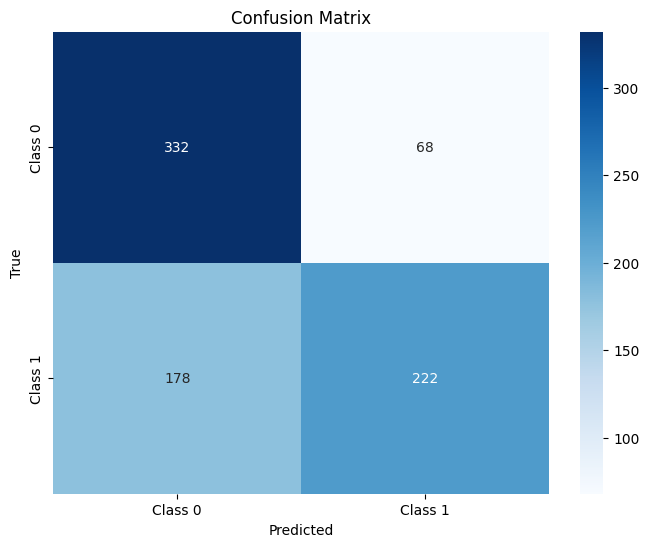

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.6925
Precision: 0.6509803921568628
Recall: 0.83
F1-Score: 0.7296703296703296


In [ ]:
# Creating and compiling the model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model_lstm.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

#Model evaluation
evaluation_results = evaluate_model(model_lstm, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 71, 100)           1177400   
                                                                 
 lstm (LSTM)                 (None, 71, 64)            42240     
                                                                 
 dense (Dense)               (None, 71, 1)             65        
                                                                 
Total params: 1219705 (4.65 MB)
Trainable params: 1219705 (4.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2 layers

In [ ]:
#Model creation
model_lstm1 = Sequential()
model_lstm1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm1.add(LSTM(128, return_sequences=True))
model_lstm1.add(LSTM(64, return_sequences=True))
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dense(32, activation='relu'))
model_lstm1.add(Dense(1, activation='sigmoid'))

model_lstm1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model_lstm1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)


Epoch 1/5
100/100 [==============================] - 12s 85ms/step - loss: 0.6917 - accuracy: 0.5108
Epoch 2/5
100/100 [==============================] - 3s 35ms/step - loss: 0.5878 - accuracy: 0.7234
Epoch 3/5
100/100 [==============================] - 2s 21ms/step - loss: 0.4296 - accuracy: 0.8485
Epoch 4/5
100/100 [==============================] - 4s 39ms/step - loss: 0.3215 - accuracy: 0.9022
Epoch 5/5
100/100 [==============================] - 2s 15ms/step - loss: 0.2376 - accuracy: 0.9352


25/25 [==============================] - 1s 6ms/step


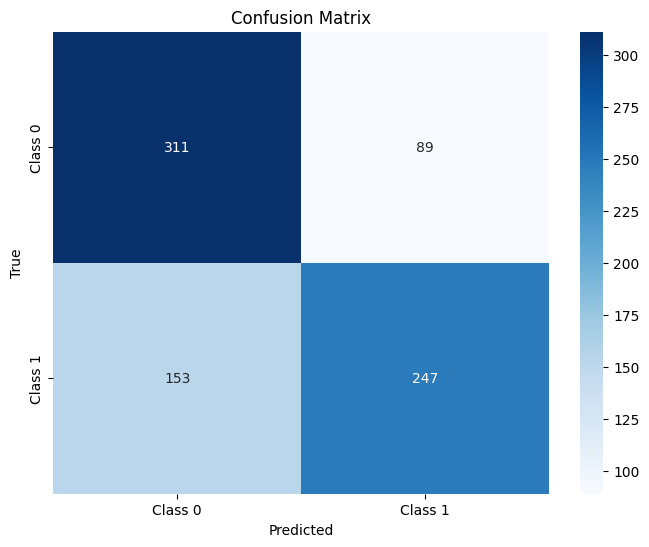

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.6975
Precision: 0.6702586206896551
Recall: 0.7775
F1-Score: 0.7199074074074074


In [ ]:
#Model evaluation
evaluation_results = evaluate_model(model_lstm1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
model_lstm1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 71, 100)           1177400   
                                                                 
 lstm_1 (LSTM)               (None, 71, 128)           117248    
                                                                 
 lstm_2 (LSTM)               (None, 71, 64)            49408     
                                                                 
 dense_1 (Dense)             (None, 71, 64)            4160      
                                                                 
 dense_2 (Dense)             (None, 71, 32)            2080      
                                                                 
 dense_3 (Dense)             (None, 71, 1)             33        
                                                                 
Total params: 1350329 (5.15 MB)
Trainable params: 1350

# BI-LSTM

##Single cell

Epoch 1/5
100/100 [==============================] - 15s 84ms/step - loss: 0.6889 - accuracy: 0.5266
Epoch 2/5
100/100 [==============================] - 5s 46ms/step - loss: 0.5609 - accuracy: 0.7557
Epoch 3/5
100/100 [==============================] - 3s 31ms/step - loss: 0.4337 - accuracy: 0.8376
Epoch 4/5
100/100 [==============================] - 5s 47ms/step - loss: 0.3675 - accuracy: 0.8715
Epoch 5/5
25/25 [==============================] - 1s 4ms/step


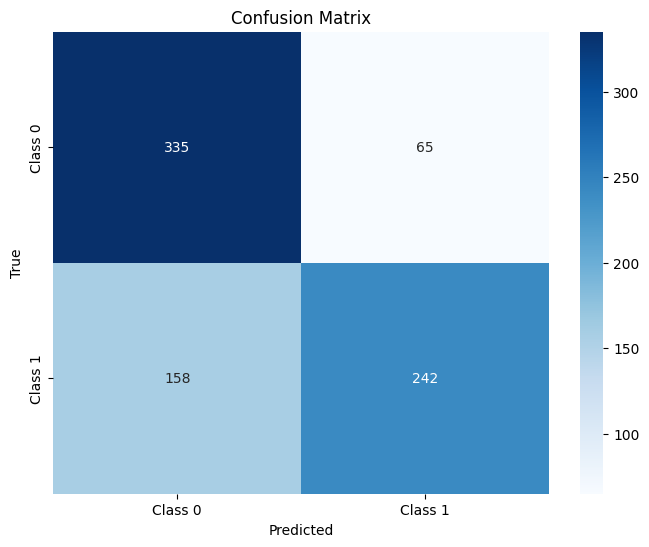

Evaluation Results (BiLSTM 1 cell ):
Accuracy: 0.72125
Precision: 0.6795131845841785
Recall: 0.8375
F1-Score: 0.7502799552071668


In [ ]:
# Model creation
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Dense(1, activation='sigmoid'))  # Changed to a single unit with sigmoid activation

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
bilstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

# Model evaluation
evaluation_results = evaluate_model(bilstm_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 1 cell ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 71, 100)           1177400   
                                                                 
 bidirectional (Bidirection  (None, 71, 128)           84480     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 71, 1)             129       
                                                                 
Total params: 1262009 (4.81 MB)
Trainable params: 1262009 (4.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Two layers

Epoch 1/5
100/100 [==============================] - 17s 114ms/step - loss: 0.6923 - accuracy: 0.5155
Epoch 2/5
100/100 [==============================] - 4s 36ms/step - loss: 0.6298 - accuracy: 0.6477
Epoch 3/5
100/100 [==============================] - 4s 39ms/step - loss: 0.4546 - accuracy: 0.8276
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 0.3420 - accuracy: 0.8752
Epoch 5/5
25/25 [==============================] - 1s 6ms/step


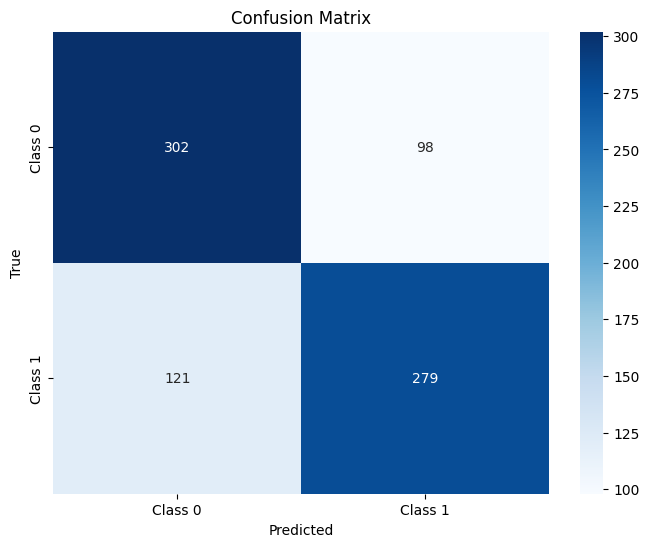

Evaluation Results (BiLSTM 2 cells ):
Accuracy: 0.72625
Precision: 0.7139479905437353
Recall: 0.755
F1-Score: 0.7339003645200487


In [ ]:
#Model creation
bilstm_model1 = Sequential()
bilstm_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model1.add(Bidirectional(LSTM(128, return_sequences=True)))
bilstm_model1.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model1.add(Dense(64, activation='relu'))
bilstm_model1.add(Dense(32, activation='relu'))
bilstm_model1.add(Dense(1, activation='sigmoid'))

bilstm_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
bilstm_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

#Model evaluation
evaluation_results = evaluate_model(bilstm_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])


In [ ]:
#Saving the model
from keras.models import load_model
bilstm_model1.save("bilstm_model1.h5")
loaded_model = load_model("bilstm_model1.h5")


#GRU


In [ ]:
from tensorflow.keras.layers import GRU
#Model creation
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Model training
gru_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

Epoch 1/5
100/100 [==============================] - 15s 90ms/step - loss: 0.6931 - accuracy: 0.5210
Epoch 2/5
100/100 [==============================] - 4s 39ms/step - loss: 0.6242 - accuracy: 0.6408
Epoch 3/5
100/100 [==============================] - 3s 27ms/step - loss: 0.3759 - accuracy: 0.8622
Epoch 4/5
100/100 [==============================] - 3s 28ms/step - loss: 0.2293 - accuracy: 0.9185
Epoch 5/5
100/100 [==============================] - 2s 22ms/step - loss: 0.1447 - accuracy: 0.9548


25/25 [==============================] - 1s 9ms/step


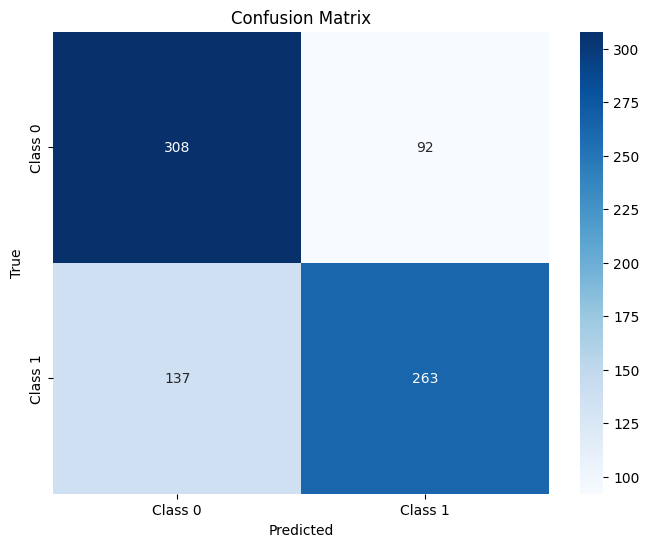

Evaluation Results (BiGRU 1 cells ):
Accuracy: 0.71375
Precision: 0.6921348314606741
Recall: 0.77
F1-Score: 0.7289940828402367


In [ ]:
#Model evaluation
evaluation_results = evaluate_model(gru_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiGRU 1 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [ ]:
from keras.models import load_model
gru_model.save("gru_model.h5")
loaded_model = load_model("gru_model.h5")


#BiGRU

Epoch 1/5
100/100 [==============================] - 14s 114ms/step - loss: 0.6917 - accuracy: 0.5224
Epoch 2/5
100/100 [==============================] - 3s 35ms/step - loss: 0.5782 - accuracy: 0.7120
Epoch 3/5
100/100 [==============================] - 3s 28ms/step - loss: 0.3949 - accuracy: 0.8630
Epoch 4/5
100/100 [==============================] - 6s 58ms/step - loss: 0.2725 - accuracy: 0.9191
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


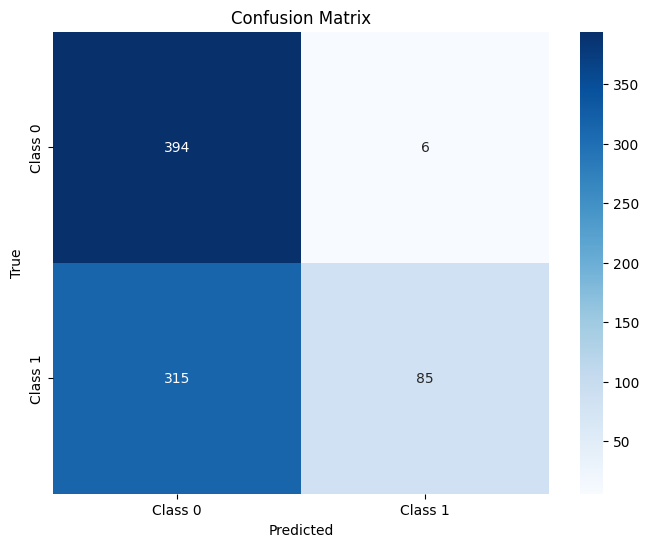

Accuracy on New Test Data Bi Directional GRU : {'accuracy': 0.59875, 'precision': 0.5557122708039492, 'recall': 0.985, 'f1': 0.7105500450856629}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
import numpy as np

# Model creation
gru_model1 = Sequential()
gru_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model1.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model1.add(Dense(1, activation='sigmoid'))

gru_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
gru_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

accuracy_dl = evaluate_model(gru_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print(f"Accuracy on New Test Data Bi Directional GRU : {accuracy_dl}")



25/25 [==============================] - 0s 6ms/step


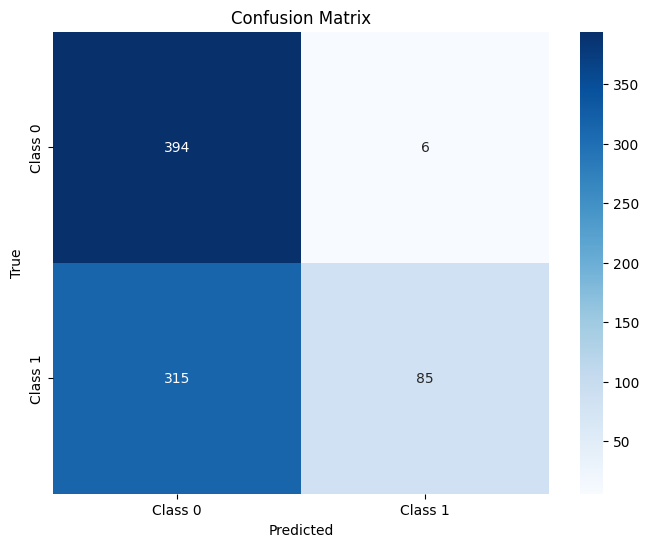

Evaluation Results (BiGRU 1 cells ):
Accuracy: 0.59875
Precision: 0.5557122708039492
Recall: 0.985
F1-Score: 0.7105500450856629


In [ ]:
#Model evaluation
evaluation_results = evaluate_model(gru_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiGRU 1 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

# Stacking method of regular ML Models

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [ ]:
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('nb', MultinomialNB())
]

In [ ]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [ ]:
stacking_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = stacking_classifier.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test data: {accuracy}")

Accuracy on the test data: 0.7475


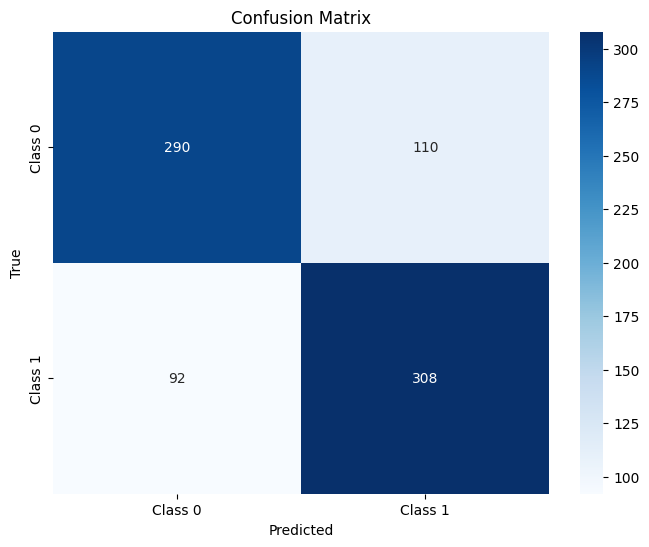

Accuracy: 0.7475
Precision: 0.7591623036649214
Recall: 0.725
F1-Score: 0.7416879795396419


In [ ]:
ml_model_eval(y_test,y_pred)